In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_excel("/Users/vignesh/Documents/Y4S1/FYP/Data/CosyCinema - 3Sep2025_cleaned.xlsx")

# Drop empty unnamed columns if any
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

# Display quick structure
df.shape, df.columns


((22, 19),
 Index(['Start time', 'Which school are you from?', 'I am a/an:',
        'Year of Study',
        'How did you know about our event? (Please click all that apply)',
        'What did you like most about our booth/event?',
        'To what extent do you agree with the following statements?.The selection of movie is meaningful and encourages me to reflect on my well-being. ',
        'To what extent do you agree with the following statements?.I found the movie’s themes relevant to my own life and experiences. ',
        'To what extent do you agree with the following statements?.I gained something useful from the screening that I can apply to improve my well-being or outlook on life. ',
        'To what extent do you agree with the following statements?.I enjoyed the interactive session after the movie and was able to participate actively.',
        'To what extent do you agree with the following statements?.I felt safe and respected during the event.',
        'To what exten

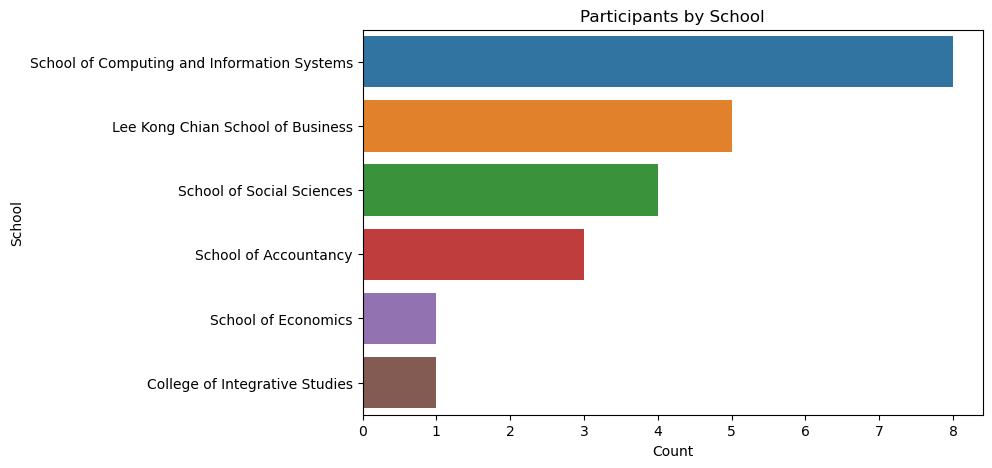

In [2]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, y="Which school are you from?", order=df["Which school are you from?"].value_counts().index)
plt.title("Participants by School")
plt.xlabel("Count")
plt.ylabel("School")
plt.show()


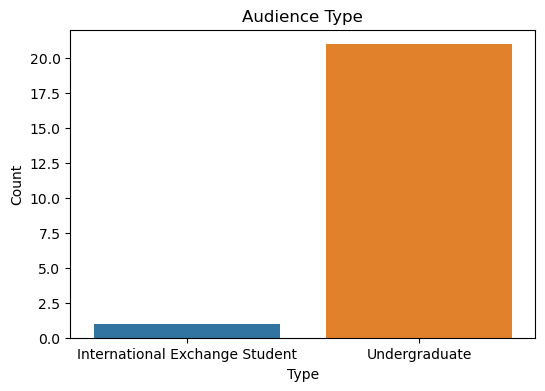

In [3]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="I am a/an:")
plt.title("Audience Type")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


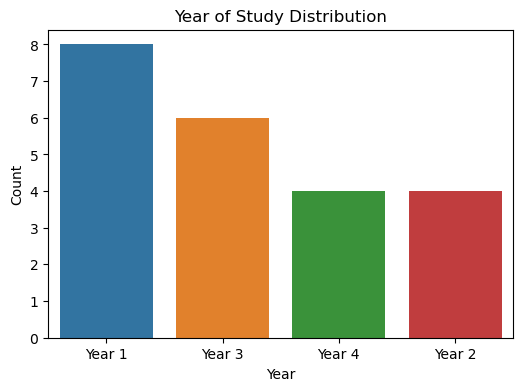

In [4]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Year of Study", order=df["Year of Study"].value_counts().index)
plt.title("Year of Study Distribution")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


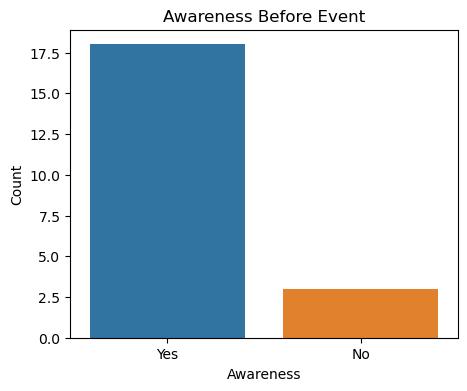

In [5]:
plt.figure(figsize=(5,4))
sns.countplot(data=df, x="Were you aware of Cosy Haven and the SMU Peer Helpers before this event?")
plt.title("Awareness Before Event")
plt.xlabel("Awareness")
plt.ylabel("Count")
plt.show()


/Users/vignesh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


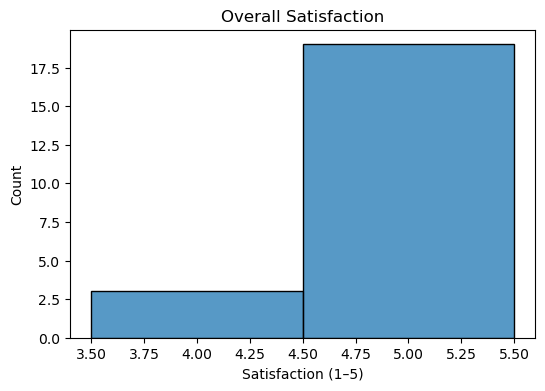

In [6]:
plt.figure(figsize=(6,4))
sns.histplot(df["Overall, how satisfied are you with the event?"], bins=[1,2,3,4,5,6], discrete=True)
plt.title("Overall Satisfaction")
plt.xlabel("Satisfaction (1–5)")
plt.ylabel("Count")
plt.show()


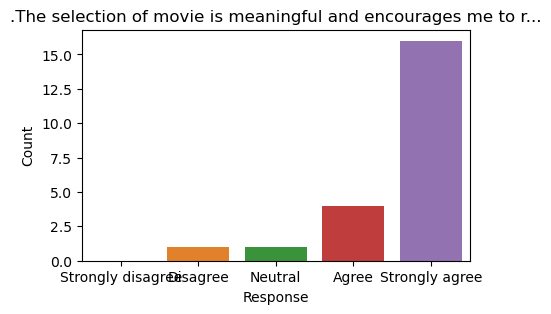

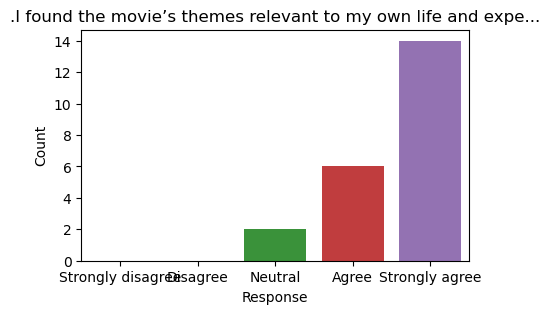

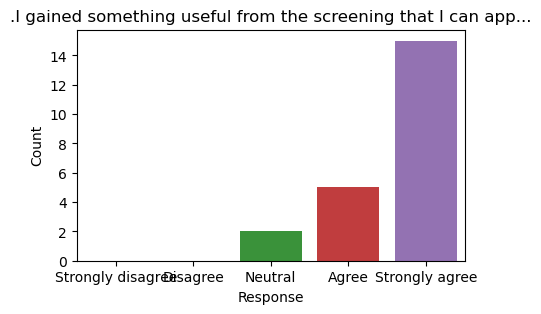

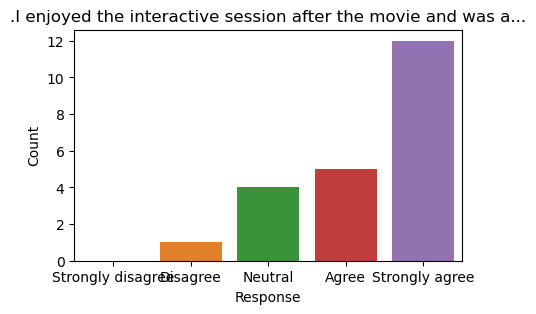

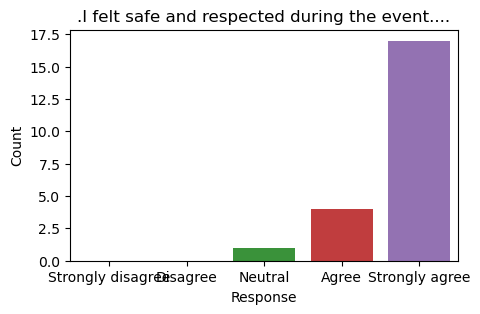

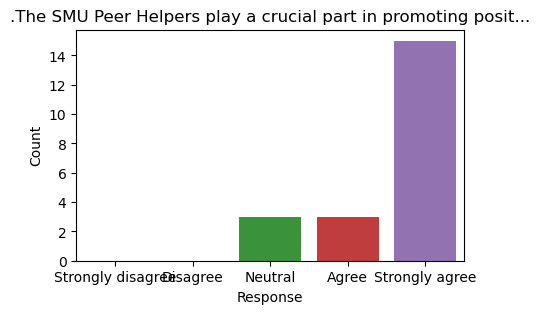

In [15]:
likert_cols = [c for c in df.columns if "To what extent" in c]

for col in likert_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(data=df, x=col, order=["Strongly disagree","Disagree","Neutral","Agree","Strongly agree"])
    plt.title(col.split("?")[-1][:60] + "...")
    plt.xlabel("Response")
    plt.ylabel("Count")
    plt.show()


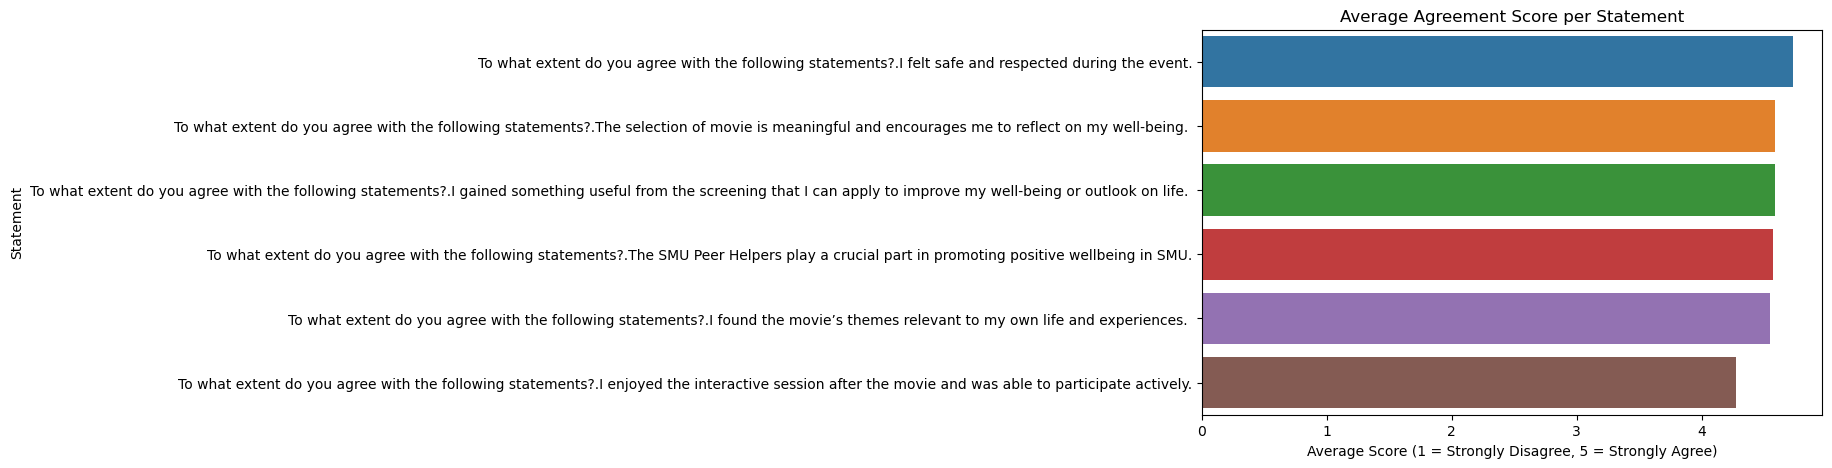

To what extent do you agree with the following statements?.I felt safe and respected during the event.                                                                    4.727273
To what extent do you agree with the following statements?.The selection of movie is meaningful and encourages me to reflect on my well-being.                            4.590909
To what extent do you agree with the following statements?.I gained something useful from the screening that I can apply to improve my well-being or outlook on life.     4.590909
To what extent do you agree with the following statements?.The SMU Peer Helpers play a crucial part in promoting positive wellbeing in SMU.                               4.571429
To what extent do you agree with the following statements?.I found the movie’s themes relevant to my own life and experiences.                                            4.545455
To what extent do you agree with the following statements?.I enjoyed the interactive session after the mo

In [16]:
# Map Likert text → numeric scale
likert_map = {
    "Strongly disagree": 1,
    "Disagree": 2,
    "Neutral": 3,
    "Agree": 4,
    "Strongly agree": 5
}

# Apply mapping
df_numeric = df[likert_cols].replace(likert_map)

# Compute mean score per question
likert_means = df_numeric.mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=likert_means.values, y=likert_means.index, orient="h")
plt.title("Average Agreement Score per Statement")
plt.xlabel("Average Score (1 = Strongly Disagree, 5 = Strongly Agree)")
plt.ylabel("Statement")
plt.show()

likert_means


/Users/vignesh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


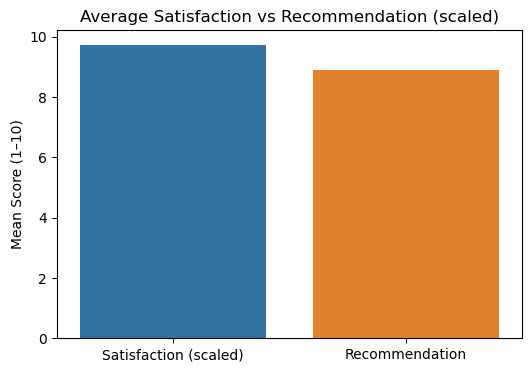

In [10]:
avg_scores = {
    "Satisfaction (scaled)": df["Satisfaction_scaled"].mean(),
    "Recommendation": df["How likely are you to recommend the event to a friend or peer?"].mean()
}

plt.figure(figsize=(6,4))
sns.barplot(x=list(avg_scores.keys()), y=list(avg_scores.values()))
plt.title("Average Satisfaction vs Recommendation (scaled)")
plt.ylabel("Mean Score (1–10)")
plt.show()


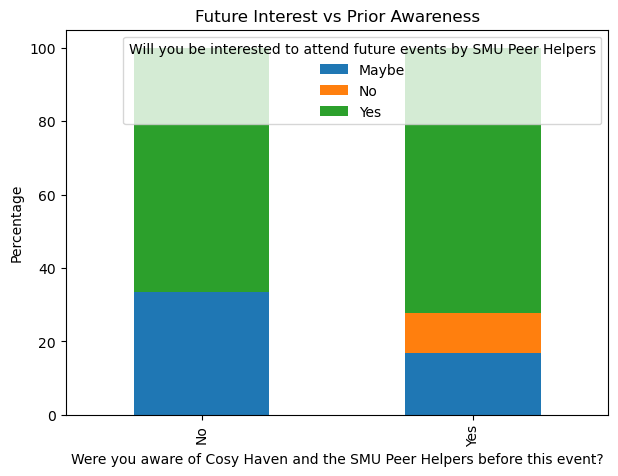

In [11]:
cross_tab = pd.crosstab(df["Were you aware of Cosy Haven and the SMU Peer Helpers before this event?"],
                        df["Will you be interested to attend future events by SMU Peer Helpers"],
                        normalize="index")*100

cross_tab.plot(kind="bar", stacked=True, figsize=(7,5))
plt.title("Future Interest vs Prior Awareness")
plt.ylabel("Percentage")
plt.show()


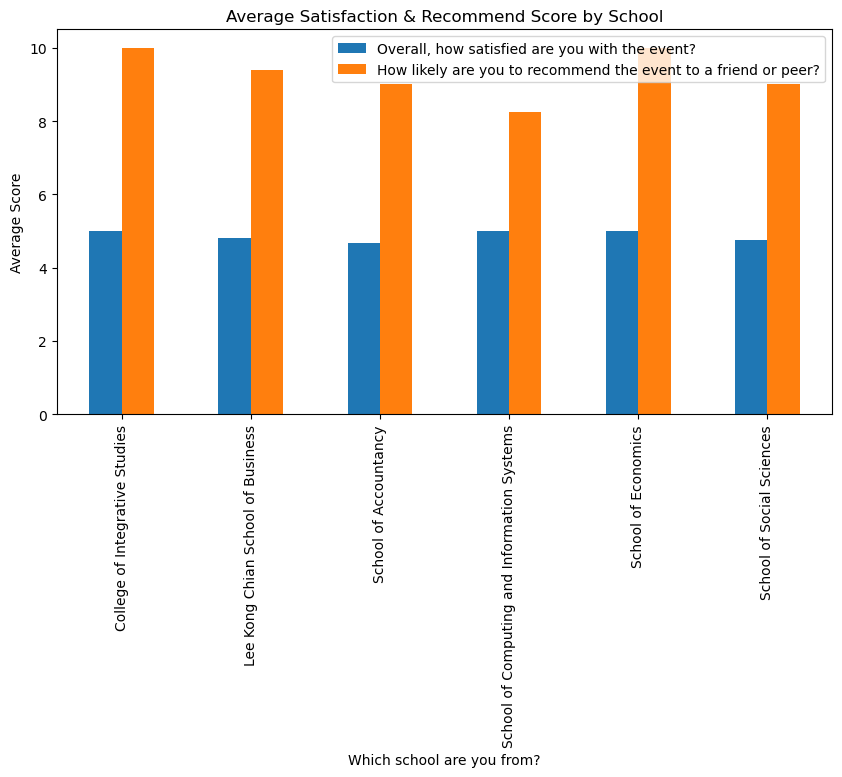

In [12]:
school_scores = df.groupby("Which school are you from?")[["Overall, how satisfied are you with the event?",
                                                         "How likely are you to recommend the event to a friend or peer?"]].mean()

school_scores.plot(kind="bar", figsize=(10,5))
plt.title("Average Satisfaction & Recommend Score by School")
plt.ylabel("Average Score")
plt.show()


In [13]:
from collections import Counter
import re

text_cols = ["\nWhat is one key takeaway from this event? (one sentence will do!)",
             "How could this event be improved?"]

all_text = " ".join(df[text_cols].fillna("").astype(str).values.flatten())
words = re.findall(r"\w+", all_text.lower())
common_words = Counter(words).most_common(20)

pd.DataFrame(common_words, columns=["word","count"])


,word,count
0,the,15
1,life,14
2,to,12
3,is,8
4,nil,7
5,it,7
6,that,6
7,in,6
8,i,6
9,more,5


/Users/vignesh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


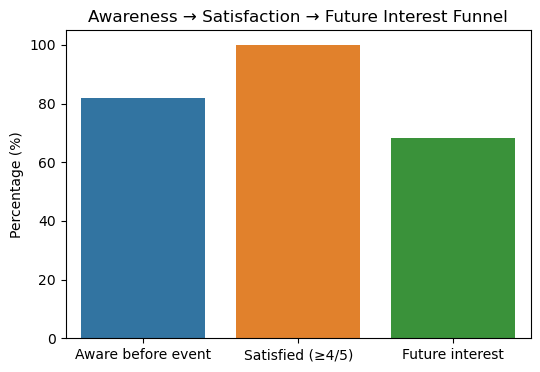

In [14]:
funnel = {
    "Aware before event": df["Were you aware of Cosy Haven and the SMU Peer Helpers before this event?"].eq("Yes").mean()*100,
    "Satisfied (≥4/5)": (df["Overall, how satisfied are you with the event?"] >= 4).mean()*100,
    "Future interest": df["Will you be interested to attend future events by SMU Peer Helpers"].eq("Yes").mean()*100
}

plt.figure(figsize=(6,4))
sns.barplot(x=list(funnel.keys()), y=list(funnel.values()))
plt.title("Awareness → Satisfaction → Future Interest Funnel")
plt.ylabel("Percentage (%)")
plt.show()


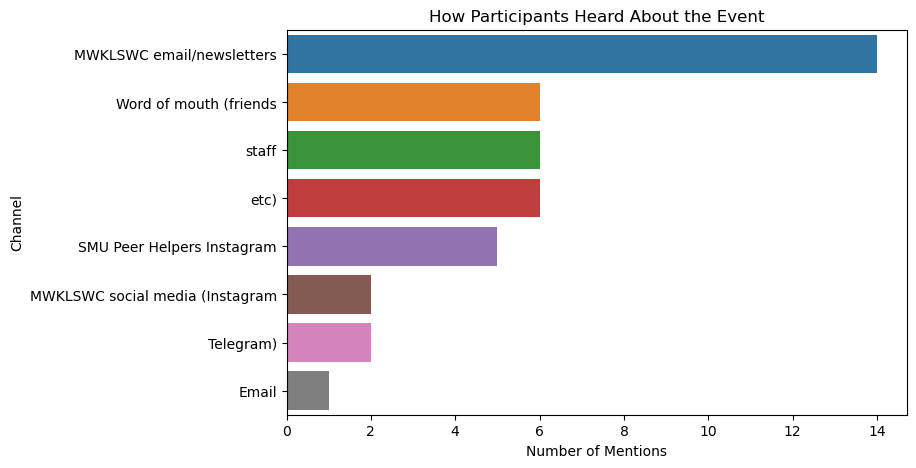

,Channel,Count
0,MWKLSWC email/newsletters,14
1,Word of mouth (friends,6
2,staff,6
3,etc),6
4,SMU Peer Helpers Instagram,5
5,MWKLSWC social media (Instagram,2
6,Telegram),2
7,Email,1


In [17]:
# Column name (adjust if slightly different in your file)
col = "How did you know about our event? (Please click all that apply)"

# Split responses by ; or , into separate options
channels = df[col].dropna().str.split(r";|,")

# Flatten into one big list
all_channels = []
for lst in channels:
    all_channels.extend([x.strip() for x in lst if x.strip() != ""])

# Count frequency
from collections import Counter
channel_counts = Counter(all_channels)

# Convert to dataframe
channel_df = pd.DataFrame(channel_counts.most_common(), columns=["Channel","Count"])

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=channel_df, x="Count", y="Channel", orient="h")
plt.title("How Participants Heard About the Event")
plt.xlabel("Number of Mentions")
plt.ylabel("Channel")
plt.show()

channel_df


In [22]:
# ---- Aliases for Vivace dataset ----
col_school   = "Which school are you from?"
col_channel  = "How did you know about our event? (Please click all that apply)"
col_like     = "What did you like most about our booth/event?"
col_sat      = "Overall, how satisfied are you with the event?"
col_comments = "Any other feedback? :) (e.g. what movie ?)"

# Likert-type questions
likert_cols = [c for c in df.columns if c.startswith("To what extent")]
likert_cols


['To what extent\xa0do you agree with the following statements?.The selection of movie is meaningful and encourages me to reflect on my well-being. ',
 'To what extent\xa0do you agree with the following statements?.I found the movie’s themes relevant to my own life and experiences. ',
 'To what extent\xa0do you agree with the following statements?.I gained something useful from the screening that I can apply to improve my well-being or outlook on life. ',
 'To what extent\xa0do you agree with the following statements?.I enjoyed the interactive session after the movie and was able to participate actively.',
 'To what extent\xa0do you agree with the following statements?.I felt safe and respected during the event.',
 'To what extent\xa0do you agree with the following statements?.The SMU Peer Helpers play a crucial part in promoting positive wellbeing in SMU.']

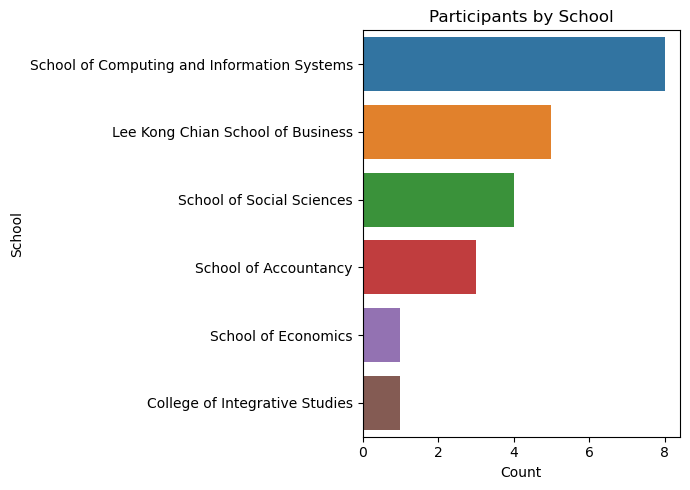

In [24]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, y=col_school, order=df[col_school].value_counts().index)
plt.title("Participants by School")
plt.xlabel("Count")
plt.ylabel("School")
plt.tight_layout()
plt.show()


In [21]:
df.columns.tolist()


['Start time',
 'Which school are you from?',
 'I am a/an:',
 'Year of Study',
 'How did you know about our event? (Please click all that apply)',
 'What did you like most about our booth/event?',
 'To what extent\xa0do you agree with the following statements?.The selection of movie is meaningful and encourages me to reflect on my well-being. ',
 'To what extent\xa0do you agree with the following statements?.I found the movie’s themes relevant to my own life and experiences. ',
 'To what extent\xa0do you agree with the following statements?.I gained something useful from the screening that I can apply to improve my well-being or outlook on life. ',
 'To what extent\xa0do you agree with the following statements?.I enjoyed the interactive session after the movie and was able to participate actively.',
 'To what extent\xa0do you agree with the following statements?.I felt safe and respected during the event.',
 'To what extent\xa0do you agree with the following statements?.The SMU Peer He